In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("fin_推し活（はまっていること）についてのアンケート_1.xlsx")
print(df.shape)

(274, 78)


In [4]:
for index, col in enumerate(df.columns):
    print(f"{index} - {col}")

0 - ID
1 - 開始時刻
2 - 完了時刻
3 - メール
4 - 名前
5 - 最終変更時刻
6 - あなたは推し活をしていますか。最も推している人・もの・キャラクター1つに限定してご回答ください。（ご自身で推し活だと認識しているもの・お金や時間をかけてはまっていることをすべて推し活とします。）
7 - 【複数選択】どんな推し活をしていますか。
8 - 【単一選択】、最も熱心に行っている推し活はどれですか​。
9 - 【複数選択】今はやっていないけれど、今後やってみたい推し活はどれですか​
10 - 推し活歴は何年ですか。数字で回答してください。
11 - １か月あたりの平均的な推し活使用金額はいくらですか​。数字で回答してください。
12 - あなたの可処分所得のうち、何％を推し活に使っていますか。※可処分所得とは、手に入れたお金（給料やおこづかいなど）から、税金や社会保険料などを引いた後に、自分で自由に使えるお金のことです。
13 - あなたの推し活の主なスタイルは下記のどれがもっとも近いですか。
14 - 推しは下記のどのカテゴリですか。
15 - アート関連のデジタルなアイテム、グッズ（スマホでDLできる壁紙、　オンライン会議の壁紙、YouTube配信する時の背景素材等）を購入した経験がありますか。
16 - 全問で解答いただいた以外に、絵画や彫刻等のアートに関して、下記のうちしてみたい推し活はどれですか。
17 - 年齢を教えてください。​数字で回答してください。
18 - 性別を教えてください。​
19 - 職業を教えてください。
20 - あなたの趣味として労力（時間）をかけているものについて当てはまるものをすべてお選びください。
21 - あなたの趣味として労力（お金）をかけているものについて当てはまるものをお選びください。
22 - 最も労力（時間やお金）をかけているもの(特にあてはまるもの）について当てはまるものをお選びください。​
23 - 私は自分自身のことを、活発で、外向的だと思う​
24 - 私は自分自身のことを、他人に不満をもち、もめごとを起こしやすいと思う​
25 - 私は自分自身のことを、しっかりしていて、自分に厳しいと思う​
26 - 私は自分自身のことを、新しいことが好きで、変わった考えをもつと思う​
27 - 私は自分

In [13]:
print(df.iloc[:,8].value_counts)

<bound method IndexOpsMixin.value_counts of 0          公式の動画・音楽視聴、snsにいいね
1        ライブ・フェス・リアルイベントに参加する
2        ライブ・フェス・リアルイベントに参加する
3        ライブ・フェス・リアルイベントに参加する
4        ライブ・フェス・リアルイベントに参加する
                ...          
269    二次創作（同人誌・同人グッズ）を見る・買う​
270      ライブ・フェス・リアルイベントに参加する
271          出演するテレビ・ラジオ番組の視聴
272      ライブ・フェス・リアルイベントに参加する
273      ライブ・フェス・リアルイベントに参加する
Name: 【単一選択】、最も熱心に行っている推し活はどれですか​。, Length: 274, dtype: object>


/home/codespace/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) IPAexGothic.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) IPAexGothic.
  fig.canvas.print_figure(bytes_io, **kw)


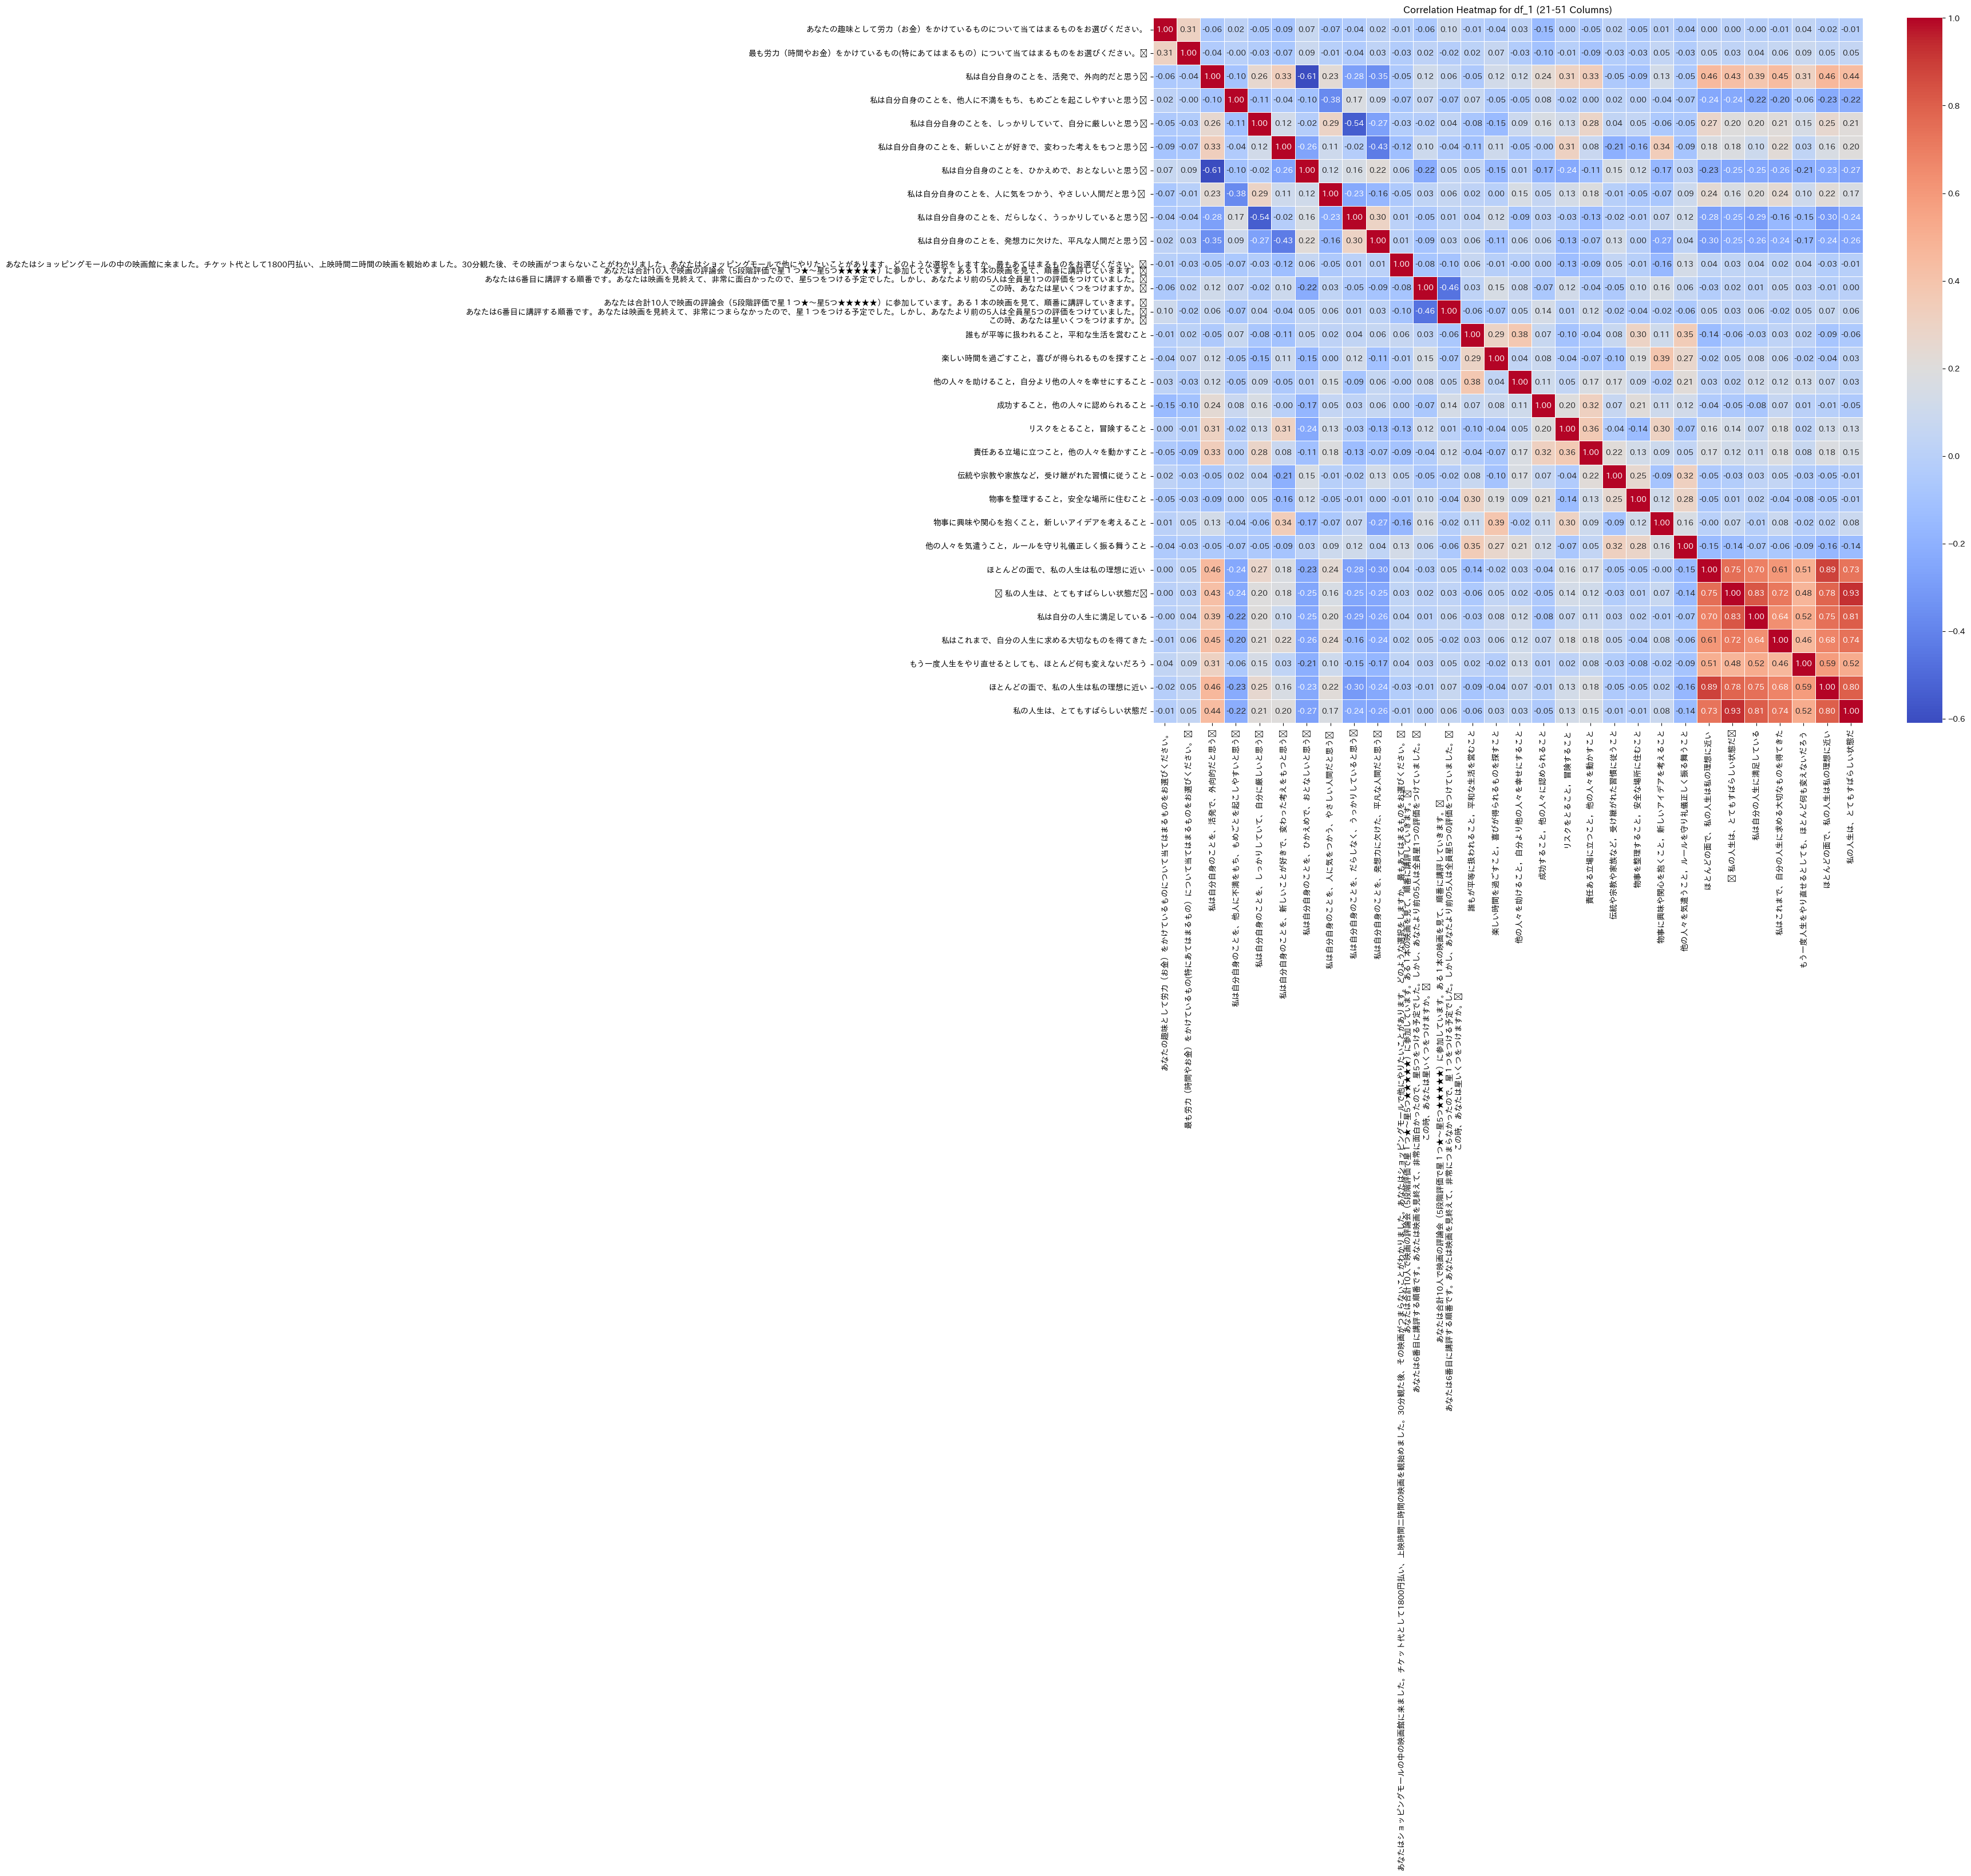

In [99]:
### 21-51の相関


# 該当カラムを抽出
df_1 = df.iloc[:, 21:51].copy()

# カテゴリか数値かを分別
num_cols_1 = df_1.select_dtypes(include=['int64', 'float64']).columns
cat_cols_1 = df_1.select_dtypes(exclude=['int64', 'float64']).columns

# カテゴリをstr型に変換
df_1_encoded = df_1.copy()
df_1_encoded[cat_cols_1] = df_1_encoded[cat_cols_1].astype(str)

# カテゴリをラベリング
label_encoders_1 = {col: LabelEncoder() for col in cat_cols_1}
df_1_encoded[cat_cols_1] = df_1_encoded[cat_cols_1].apply(lambda col: label_encoders_1[col.name].fit_transform(col))

# 相関を計算
corr_matrix = df_1_encoded.corr()

# 描画
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap for df_1 (21-51 Columns)")
plt.show()


/tmp/ipykernel_5456/2280480620.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[cat_cols_2] = df_2[cat_cols_2].astype(str)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) IPAexGothic.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) IPAexGothic.
  fig.canvas.print_figure(bytes_io, **kw)


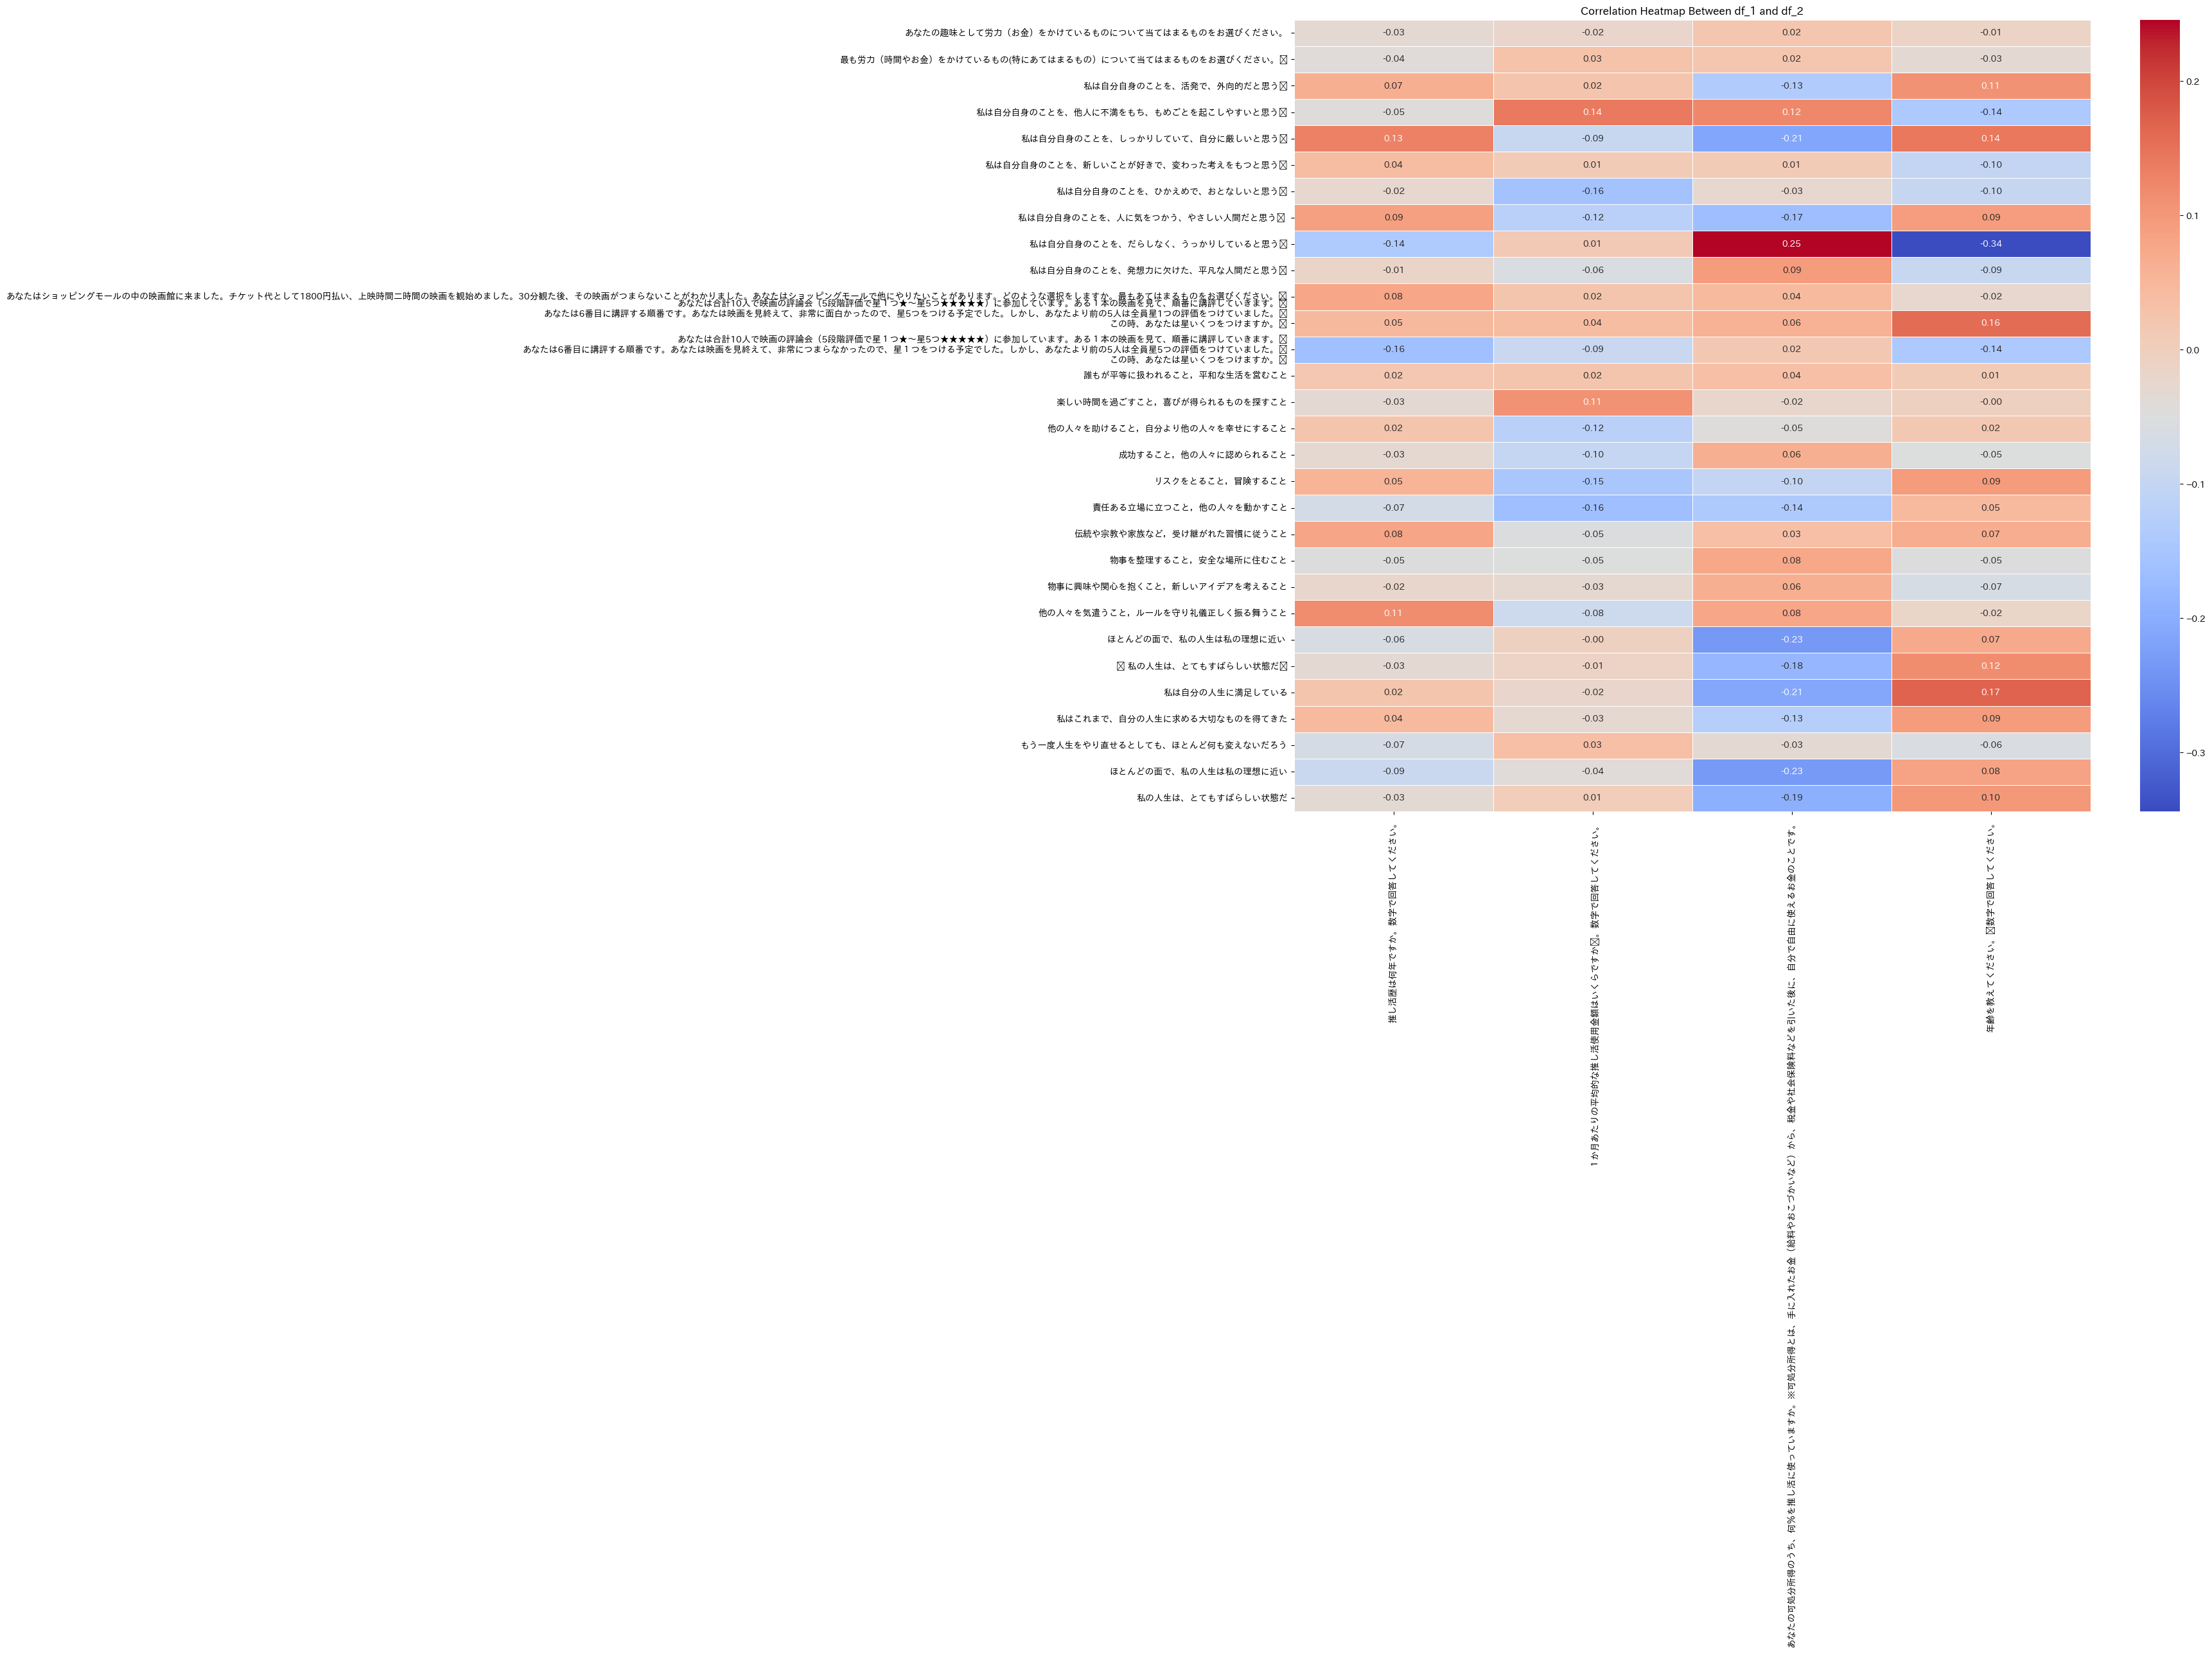

In [100]:
### 21-51と[10, 11, 12, 17]の相関

# 該当カラムを抽出
df_1 = df_1
df_2 = df.iloc[:, [10, 11, 12, 17]]

# カテゴリか数値か分別
num_cols_1 = df_1.select_dtypes(include=['int64', 'float64']).columns
cat_cols_1 = df_1.select_dtypes(exclude=['int64', 'float64']).columns

num_cols_2 = df_2.select_dtypes(include=['int64', 'float64']).columns
cat_cols_2 = df_2.select_dtypes(exclude=['int64', 'float64']).columns

# カテゴリをstr型に変換
df_1[cat_cols_1] = df_1[cat_cols_1].astype(str)
df_2[cat_cols_2] = df_2[cat_cols_2].astype(str)

# カテゴリにラベリング
label_encoders_1 = {col: LabelEncoder() for col in cat_cols_1}
df_1_encoded = df_1.copy()
df_1_encoded[cat_cols_1] = df_1_encoded[cat_cols_1].apply(lambda col: label_encoders_1[col.name].fit_transform(col))

label_encoders_2 = {col: LabelEncoder() for col in cat_cols_2}
df_2_encoded = df_2.copy()
df_2_encoded[cat_cols_2] = df_2_encoded[cat_cols_2].apply(lambda col: label_encoders_2[col.name].fit_transform(col))

# dfを結合
merged_df = pd.concat([df_1_encoded, df_2_encoded], axis=1)

# 相関を計算
corr_matrix = merged_df.corr().loc[df_1.columns, df_2.columns]

# 描画
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap Between df_1 and df_2")
plt.show()
